In [1]:
import numpy as np
import matplotlib.pyplot as plt

from agent import *
from environment import *
from controller import Controller

/home/timestring/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def getResponseRates(results):
    """
    Returns: (# Total events, # accepts, # dismisses, total rewards)
    """
    notificationEvents = [r for r in results if r['decision']]
    numNotifications = len(notificationEvents)
    numAcceptedNotifications = len([r for r in notificationEvents if r['reward'] > 0])
    numDismissedNotifications = len([r for r in notificationEvents if r['reward'] < 0])
    totalRewards = sum([r['reward'] for r in notificationEvents])
    return (numNotifications, numAcceptedNotifications, numDismissedNotifications, totalRewards)

In [3]:
def filterByWeek(results, week):
    startDay = week * 7
    endDay = startDay + 7
    return [r for r in results
            if startDay <= r['context']['numDaysPassed'] and r['context']['numDaysPassed'] < endDay]

In [4]:
def filterByDay(results, day):
    return [r for r in results if r['context']['numDaysPassed'] == day]

In [5]:
def getEnvironment():
    return MTurkSurveyUser(filePaths=[
            'survey/ver2_mturk/results/01_1st_Batch_3137574_batch_results.csv',
            'survey/ver2_mturk/results/02_Batch_3148398_batch_results.csv',
            'survey/ver2_mturk/results/03_Batch_3149214_batch_results.csv',
    ], filterFunc=(lambda r: ord(r['rawWorkerID'][-1]) % 3 == 2), dismissWarningMsg=True)

In [6]:
def getSVMAgent():
    agent = SVMAgent()
    agent.loadModel('agent/pretrained_models/classifiers/mturk_3000_m3_r1.txt')
    return agent

In [7]:
def getNNAgent():
    agent = NNAgent()
    agent.loadModel('agent/pretrained_models/classifiers/mturk_3000_m3_r1.txt')
    return agent

In [8]:
def getQLearningAgent():
    return QLearningAgent2()

In [9]:
def getContextualBanditAgent():
    return ContextualBanditSVMAgent()

In [10]:
def repeatEvaluationProcess(createAgentFunc, createEnvironmentFunc, repeat=10):
    simulationWeek = 20
    
    dailyAcceptingRate = np.zeros((repeat, simulationWeek * 7))
    dailyDismissingRate = np.zeros((repeat, simulationWeek * 7))
    dailyReward = np.zeros((repeat, simulationWeek * 7))
    weeklyAcceptingRate = np.zeros((repeat, simulationWeek))
    weeklyDismissingRate = np.zeros((repeat, simulationWeek))
    weeklyReward = np.zeros((repeat, simulationWeek))
    
    for iRound in range(repeat):
        agent = createAgentFunc()
        environment = createEnvironmentFunc()
        controller = Controller(agent, environment, simulationWeek=simulationWeek,
                                negativeReward=-5, verbose=False)
        results = controller.execute()
        for iDay in range(simulationWeek * 7):
            dailyResults = filterByDay(results, iDay)
            nTotal, nAccept, nDismiss, reward = getResponseRates(dailyResults)
            dailyAcceptingRate[iRound, iDay] = nAccept / nTotal if nTotal > 0 else 0.
            dailyDismissingRate[iRound, iDay] = nDismiss / nTotal if nTotal > 0 else 0.
            dailyReward[iRound, iDay] = reward
        for iWeek in range(simulationWeek):
            weeklyResults = filterByWeek(results, iWeek)
            nTotal, nAccept, nDismiss, reward = getResponseRates(weeklyResults)
            weeklyAcceptingRate[iRound, iWeek] = nAccept / nTotal if nTotal > 0 else 0.
            weeklyDismissingRate[iRound, iWeek] = nDismiss / nTotal if nTotal > 0 else 0.
            weeklyReward[iRound, iWeek] = reward
    meanDailyAcceptingRate = np.mean(dailyAcceptingRate, axis=0)
    stdDailyAcceptingRate = np.std(dailyAcceptingRate, axis=0)
    meanDailyDismissingRate = np.mean(dailyDismissingRate, axis=0)
    stdDailyDismissingRate = np.std(dailyDismissingRate, axis=0)
    meanDailyReward = np.mean(dailyReward, axis=0)
    stdDailyReward = np.std(dailyReward, axis=0)
    meanWeeklyAcceptingRate = np.mean(weeklyAcceptingRate, axis=0)
    stdWeeklyAcceptingRate = np.std(weeklyAcceptingRate, axis=0)
    meanWeeklyDismissingRate = np.mean(weeklyDismissingRate, axis=0)
    stdWeeklyDismissingRate = np.std(weeklyDismissingRate, axis=0)
    meanWeeklyReward = np.mean(weeklyReward, axis=0)
    stdWeeklyReward = np.std(weeklyReward, axis=0)
    
    plt.plot(meanDailyAcceptingRate)
    plt.ylabel('Daliy accepting rate')
    plt.show()
    
    plt.plot(meanWeeklyAcceptingRate)
    plt.ylabel('Weekly accepting rate')
    plt.show()
    
    plt.plot(stdDailyDismissingRate)
    plt.ylabel('Daliy dismissing rate')
    plt.show()
    
    plt.plot(meanWeeklyDismissingRate)
    plt.ylabel('Weekly dismissing rate')
    plt.show()
    
    plt.plot(meanDailyReward)
    plt.ylabel('daily reward')
    plt.show()
    
    plt.plot(meanWeeklyReward)
    plt.ylabel('Weekly reward')
    plt.show()

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

Begin to train the model


/home/timestring/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Finish training the model


No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

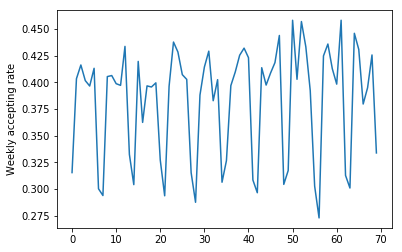

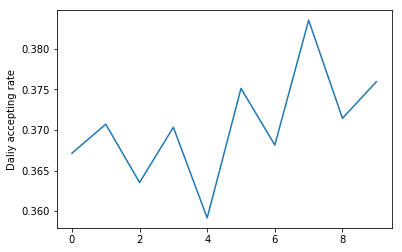

In [13]:
# SVM
repeatEvaluationProcess(getSVMAgent, getEnvironment)

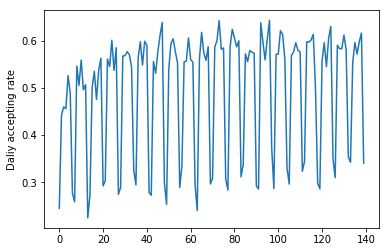

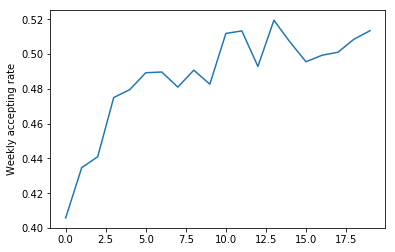

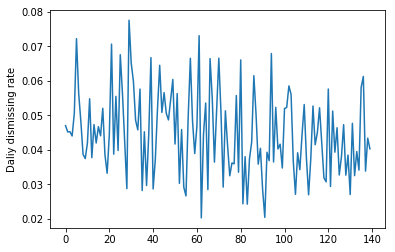

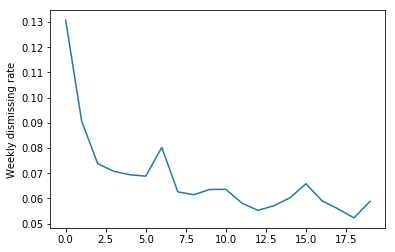

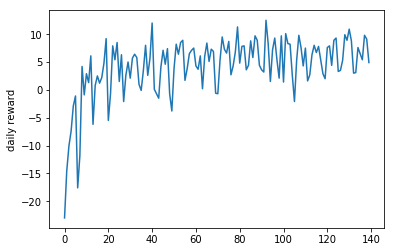

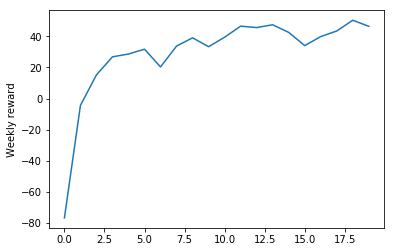

In [11]:
# Q-Learning
repeatEvaluationProcess(getQLearningAgent, getEnvironment)

In [16]:
countDown = 0
cnt = 0
for i in range(2000):
    if countDown == 0:
        cnt += 1
        #countDown = max(1, int(np.log(i+1)))
        countDown = max(1, int(i ** 0.5))
    countDown -= 1
print(cnt)

94
